<a href="https://colab.research.google.com/github/ShinyQ/Analisis-Sentimen-Kebijakan-Vaksinasi-COVID-19-Pemerintah_Naive-Bayes-Classifier/blob/main/Tugas_Besar_WGTIK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar Wawasan Global TIK**

> **Analisis Sentimen Kebijakan Pemerintah Mengenai Vaksin COVID-19 Di Indonesia Menggunakan Metode Naive Bayes Classifier Pada Sosial Media Twitter**



**Oleh Kelompok 152 :**
1. Fadhlurrahman Akbar Nasution (1301194258) / IF-42-GAB01
2. Firdaus Putra Kurniyanto (1301190385) / IF-42-GAB01
3. Ignasius Nindra Karisma Forestyanto  (1301194138)  / IF-42-GAB02
4. Kurniadi Ahmad Wijaya (1301194024) / IF-42-GAB01
5. Priyan Fadhil Supriyadi (1301190442) / IF-42-GAB01


**Penjelasan Projek :**

Adapun pada penelitian menekankan kepada sentimen masyarakat terhadap kebijakan pemerintah mengenai vaksin COVID-19. Proses analisisnya akan dilakukan berdasarkan tweet yang menyertakan tagar vaksin dan pencarian di twitter dengan keyword vaksin covid 19.




# **Tweet Crawling**

Mengambil Data Dari Post Tweet Dari Twitter Menggunakan API Twitter
Data Yang Diambil Berkisar Dari Tanggal 15-24 Desember dengan proses fetch manual karena limit pengambilan data tweeter sehingga pada akhirnya  Row 8000+ Tweet.


In [ ]:
pip install tweepy

In [ ]:
from tweepy import OAuthHandler
import tweepy
import csv

In [ ]:
access_token = "1339862432500498433-bWl7UFBHqQTdKCIbj0GavDCIsnHHeT"
access_token_secret ="vmP6Eb1WBGIwaGiRUHCLo69OwEzKVbcQOp6iMXBuw99aF"
consumer_key ="PodLGfK2ky8VbG1mFpEKOFLTQ"
consumer_secret="0QocN2CdV41mCdUEd5VWxpMjNB4UqCFE0hG6zPwmVOTEuCcf7f"

In [ ]:
# Autentikasi API Twitter 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

def scraptweets(search_words, date_since, date_until, numTweets):
    # Membuat Kolom Untuk Di Export Ke Excel  
    db_tweets = pd.DataFrame(columns=[
                                      'username', 'acctdesc', 'location', 'following',
                                      'totaltweets', 'usercreatedts', 'tweetcreatedts',
                                      'retweetcount', 'text', 'hashtags', 'followers',
                                     ])

    # Melakukan Query Pencarian Data Tweet Sesuai Kata Kunci Dan Tanggal
    tweets = tweepy.Cursor(
                    api.search, q=search_words, lang="id", 
                    since=date_since, until=date_until,  tweet_mode='extended').items()

    # Merubah Kumpulan Item Hasil Tweet Menjadi Kumpulan Data Dalam Array List
    tweet_list = [tweet for tweet in tweets]

    # Melakukan Perulangan Untuk Data Tweet Untuk Dimasukkan Kedalam CSV
    for tweet in tweet_list:
        username = tweet.user.screen_name
        acctdesc = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        usercreatedts = tweet.user.created_at
        tweetcreatedts = tweet.created_at
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']

        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text

        # Membuat Array Kumpulan Data Sesuai Kolom Dan Memasukkan Kedalam Array Data Tweet
        ith_tweet = [
                        username, acctdesc, location, following, followers, totaltweets,
                        usercreatedts, tweetcreatedts, retweetcount, text, hashtags
                    ]

        db_tweets.loc[len(db_tweets)] = ith_tweet

    # Export Data Kumpulan Tweet Ke File CSV
    filename = 'covid_vaccine_tweets.csv'
    db_tweets.to_csv(filename, index=False)
    print('Scraping has completed!')


# Format Pencarian Data Tweet
search_words = "#vaksin OR #vaksincovid19 OR #vaksincovid OR #VaksinUntukKita OR #vaksingratis"
date_since = "2020-12-23"
date_until = "2020-12-24"
numTweets = 3000

scraptweets(search_words, date_since, date_until, numTweets)

# **Wrangling Data**

In [3]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [4]:
import preprocessor as p
from textblob import TextBlob
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [ ]:
data = pd.read_csv('https://github.com/ShinyQ/Analisis-Sentimen-Kebijakan-COVID-19_Tugas-Besar-Wawasan-Global-TIK/raw/main/Dataset_Covid_Twitter_Raw.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   username        8451 non-null   object
 1   acctdesc        6722 non-null   object
 2   location        5303 non-null   object
 3   following       8451 non-null   int64 
 4   totaltweets     8451 non-null   int64 
 5   usercreatedts   8451 non-null   object
 6   tweetcreatedts  8451 non-null   object
 7   retweetcount    8451 non-null   object
 8   followers       8451 non-null   object
 9   text            8451 non-null   object
dtypes: int64(2), object(8)
memory usage: 660.4+ KB


In [ ]:
data.drop(['totaltweets', 'usercreatedts', 'location', 'followers', 'following', 'acctdesc', 'retweetcount'], axis=1, inplace=True)

In [ ]:
data.sample(n=5)

,username,tweetcreatedts,text
5421,pikiran_rakyat,7/21/2009 18:48,"Ajak Seluruh Masyarakat, Jokowi: Vaksinasi unt..."
2018,PencoretCerita,12/20/2020 6:08,Apakah kandungan vaksin\n\nBerita terkini berk...
4572,IraSKaminsky,12/18/2020 16:30,"Nah, dalam sela-sela pemberian modal usaha mik..."
7573,corona_tweet,4/27/2020 18:12,Top News Koran Rakyat Merdeka\n\nPengadaan Bar...
3548,spakenata,12/18/2020 22:52,Tetaplah disiplin menjalani protokol kesehatan...


In [ ]:
data.isnull().sum()

username          0
tweetcreatedts    0
text              0
dtype: int64

In [ ]:
def preprocessing_data(x):
    return p.clean(x)

def tokenize_data(x):
    return p.tokenize(x)

data['tweet_clean'] = data['text'].apply(preprocessing_data)
data['tweet_clean'] = data['tweet_clean'].apply(tokenize_data)
data = data.drop_duplicates()

# **Menerjemahkan Tweet Clean Ke Bahasa Inggris**

In [ ]:
pip install google_trans_new

In [ ]:
from google_trans_new import google_translator  
translator = google_translator()  

def convert_eng(tweet):
    return translator.translate(tweet,lang_tgt='en') 

data['tweet_english'] = data['tweet_clean'].apply(convert_eng)

# **Melakukan Modeling Data Untuk Analisis Sentimen**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://github.com/ShinyQ/Analisis-Sentimen-Kebijakan-COVID-19_Tugas-Besar-Wawasan-Global-TIK/raw/main/Tweet_Covid_English_Wrangled.csv')

In [5]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

data['tweet_english'] = data['tweet_english'].apply(stemming_data)

In [6]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1 
    
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 2212
Netral = 1317
Negatif = 251

Total Data : 3780


In [7]:
status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.tail()

,username,tweetcreatedts,text,tweet_clean,tweet_english,klasifikasi
3775,meno_wae,9/25/2020 3:42,Keputusan terbaik Pak Presiden untuk Rakyat In...,Keputusan terbaik Pak Presiden untuk Rakyat In...,the best decision mr. president for the indone...,Positif
3776,TitikTerangNews,11/7/2019 10:32,Tiga vaksin COVID-19 yang dibandingkan: Pfizer...,Tiga vaksin COVID-19 yang dibandingkan: Pfizer...,three covid-19 vaccines compared: pfizer-biont...,Netral
3777,ArifBijaak,8/21/2020 2:15,Alhamdulilah Vaksin Gratis..!!\n\n#lawancovid1...,Alhamdulilah Vaksin Gratis..!! #lawancovid19 #...,alhamdulillah free vaccine .. !! # lawancovid1...,Positif
3778,meno_wae,9/25/2020 3:42,Alhamdulilah Vaksin Gratis..!!\n\n#lawancovid1...,Alhamdulilah Vaksin Gratis..!! #lawancovid19 #...,alhamdulillah free vaccine .. !! # lawancovid1...,Positif
3779,PotekantropusX,12/10/2016 4:59,"Jokowi: Vaksinasi Covid-19 Gratis, Dilakukan M...","Jokowi: Vaksinasi Covid-19 Gratis, Dilakukan M...","jokowi: free covid-19 vaccination, conducted s...",Positif


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

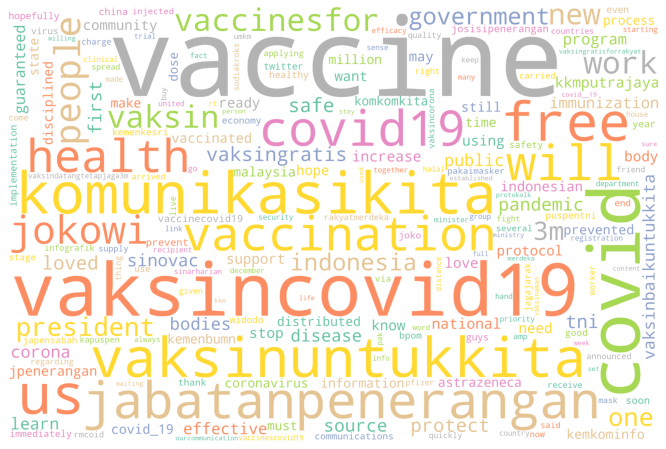

In [ ]:
all_words = ' '.join([tweets for tweets in data['tweet_english']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

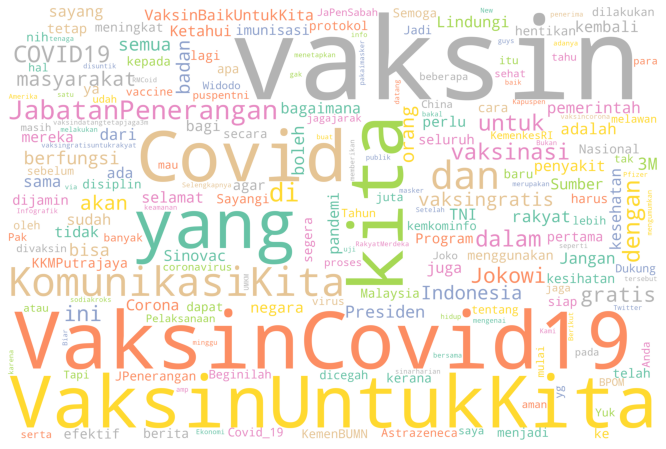

In [ ]:
all_words = ' '.join([tweets for tweets in data['tweet_clean']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

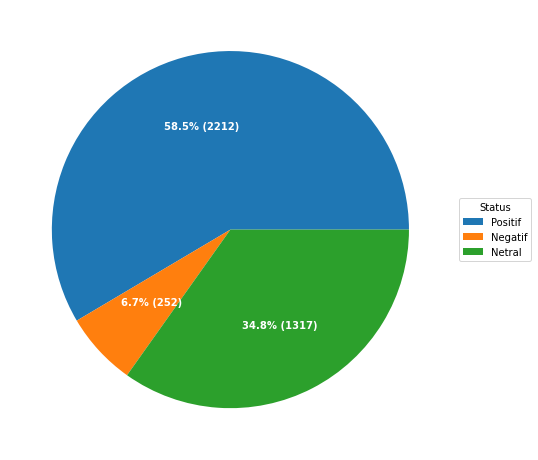

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

**Kesimpulan :** 

Masyarakat Menanggapi Positif Adanya Kebijakan Vaksinasi COVID-19

# **Klasifikasi Data Dengan Metode Naive Bayes Classifier**

In [ ]:
nltk.download('punkt')

In [ ]:
dataset = data.drop(['username',	'tweetcreatedts',	'text', 'tweet_clean'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = [] 
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else: 
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.9272486772486772


In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1
    
    status.append(analysis.classify())
    total += 1 
    
print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 2294
Netral = 1297
Negatif = 189

Total Data : 3780


In [ ]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

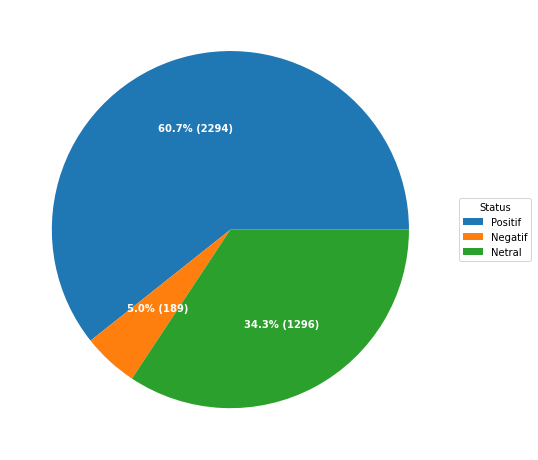

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

**Kesimpulan:** 

Dengan Menggunakan Metode Naive Bayes Classifier Dengan Tingkat Akurasi 0.93 (93%) Maka :

1.   Sentimen Positif : 2294
2.   Sentimen Netral : 1296
3.   Sentimen Negatif : 189

Sehingga Masyarakat Rata-Rata Memiliki Sentimen Positif Terhadap Kehadiran Kebijakan Vaksinasi COVID-19

## **Data Klasifikasi Yang Diubah Setelah Menggunakan Metode Naive Bayes Classifier**

In [ ]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if n[5] != n[6]:
       print(f'Text: {n[3]}\nClassifier: {n[5]}\nClassifier Bayes: {n[6]} \n')

Text: Kalau karena #Corona merasa tidak takut? Mengapa harus takut #Vaksin Padahal #vaksincorona adalah ikhtiar mengahadapi #Covid_19 #VaksinUntukNegeri #vaksinuntukkita
Classifier: Negatif
Classifier Bayes: Positif 

Text: ini anak siapa sih. justru di saudi, mentri kesehatannya yg pertama kali di vaksin. #Aagym #VaksinCOVID19
Classifier: Positif
Classifier Bayes: Netral 

Text: ini anak siapa sih. justru di saudi, mentri kesehatannya yg pertama kali di vaksin. #Aagym #VaksinCOVID19
Classifier: Positif
Classifier Bayes: Netral 

Text: Kalau karena #Corona merasa tidak takut? Mengapa harus takut #Vaksin Padahal #vaksincorona adalah ikhtiar mengahadapi #Covid_19 #VaksinUntukNegeri #vaksinuntukkita
Classifier: Negatif
Classifier Bayes: Positif 

Text: Kalau menurut kamu, apakah vaksin merupakan solusi paling tepat untuk wabah covid-19 di Indonesia? . #vaksin #sinovac #tobaai #widyaanalytic #covid19 #pandemi #indonesia #dataanalytic #data #bigdata
Classifier: Positif
Classifier Bayes: Net